In [1]:
import numpy as np
import matplotlib.pyplot as plt
# sử dụng numpy

[1. 2. 3. 4. 5. 6. 7.]


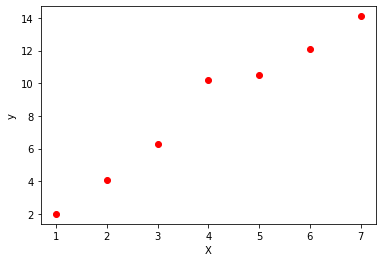

In [2]:
X=np.array([[1,2,3,4,5,6,7],
           [1.1,2.2,3.3,4.5,5.4,6.5,7.6]])
y=np.array([2,4.1,6.3,10.2,10.5,12.1,14.1])
print(X[0])
plt.plot(X[0],y,'ro')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [3]:
print(X.shape)
print(X.shape[1])
one = np.ones((X.shape[1], 1))
print(one)
print(X.T) 
X = np.concatenate((one,X.T), axis=1)
print(X) 

(2, 7)
7
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1.  1.1]
 [2.  2.2]
 [3.  3.3]
 [4.  4.5]
 [5.  5.4]
 [6.  6.5]
 [7.  7.6]]
[[1.  1.  1.1]
 [1.  2.  2.2]
 [1.  3.  3.3]
 [1.  4.  4.5]
 [1.  5.  5.4]
 [1.  6.  6.5]
 [1.  7.  7.6]]


In [4]:
w = np.array([[1]*X.shape[1]])
w = w.T
#print(w)
print(X.shape)
print(w.shape)
print(np.dot(X,w))

(7, 3)
(3, 1)
[[ 3.1]
 [ 5.2]
 [ 7.3]
 [ 9.5]
 [11.4]
 [13.5]
 [15.6]]


In [5]:
def f(X,w):
    return np.dot(X,w)
print(f(X,w))

[[ 3.1]
 [ 5.2]
 [ 7.3]
 [ 9.5]
 [11.4]
 [13.5]
 [15.6]]


In [6]:
# xây dựng một hàm loss mới
print(y)
y1 = f(X,w)
print(y1)
m = y-y1.T
print(m)
L = np.dot(m,m.T)/(2*X.shape[0])
print(L)

[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[ 3.1]
 [ 5.2]
 [ 7.3]
 [ 9.5]
 [11.4]
 [13.5]
 [15.6]]
[[-1.1 -1.1 -1.   0.7 -0.9 -1.4 -1.5]]
[[0.63785714]]


In [7]:
def loss(X,y,w):
    y1 = f(X,w)
    m = y-y1.T
    L = np.dot(m,m.T)/(2*X.shape[0])
    return L[0][0]
print(X)
print(y)
print(w)
print(loss(X,y,w))

[[1.  1.  1.1]
 [1.  2.  2.2]
 [1.  3.  3.3]
 [1.  4.  4.5]
 [1.  5.  5.4]
 [1.  6.  6.5]
 [1.  7.  7.6]]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[1]
 [1]
 [1]]
0.637857142857143


In [8]:
z = f(X,w).T[0]

print(z.shape)
print(z)
print(y)
z = z-y
print(z.shape)
print(X.shape)
print(np.dot(z,X))

(7,)
[ 3.1  5.2  7.3  9.5 11.4 13.5 15.6]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
(7,)
(7, 3)
[ 6.3  26.9  29.14]


In [9]:
# tính đạo hàm tại điểm w[i]
def derivative(X,y,w):
    z = f(X,w).T[0]
    z = z-y
    return np.dot(z,X)
print(derivative(X,y,w))

[ 6.3  26.9  29.14]


In [10]:
# update weights w 
w = np.array([[1]*X.shape[1]])
w = w.T
print(w)
learning_rate = 0.01
d = derivative(X,y,w)
d = d*learning_rate 
print(d)
w1 = w.T[0]
print(w1)
w1 = w1-d
print(w1)
w = np.array([w1]).T
print(w)

[[1]
 [1]
 [1]]
[0.063  0.269  0.2914]
[1 1 1]
[0.937  0.731  0.7086]
[[0.937 ]
 [0.731 ]
 [0.7086]]


In [11]:
# update weights w 
w = np.array([[1]*X.shape[1]])
w = w.T
print(w)
learning_rate = 0.01
def update_weights(X,y,w,learning_rate):
    # tính đạo hàm
    d = derivative(X,y,w)
    d = d*learning_rate 
    w1 = w.T[0]-d
    return np.array([w1]).T
    
w = update_weights(X,y,w,learning_rate)
print(w)

[[1]
 [1]
 [1]]
[[0.937 ]
 [0.731 ]
 [0.7086]]


In [12]:
x0 = np.linspace(start=1, stop=10, num=10)
x0 = np.array([x0]).T
print(x0.shape)
one = np.ones((x0.shape[0], 1))
x0 = np.concatenate((one,x0), axis=1)
print(x0)
z = np.dot(x0,w[:2])
print(z)
y0 = z.T[0]
print(y0)

(10, 1)
[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[[1.668]
 [2.399]
 [3.13 ]
 [3.861]
 [4.592]
 [5.323]
 [6.054]
 [6.785]
 [7.516]
 [8.247]]
[1.668 2.399 3.13  3.861 4.592 5.323 6.054 6.785 7.516 8.247]


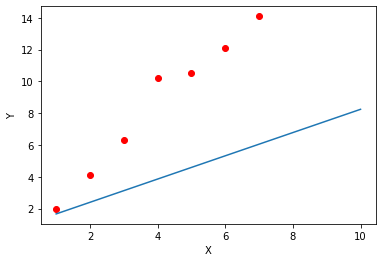

In [13]:
# check
plt.plot(X.T[1],y,'ro')
plt.xlabel('X')
plt.ylabel('Y')
#x0 = np.linspace(start=1, stop=10, num=50)
#y0 = w[0]+w[1]*x0
x1 = np.linspace(start=1, stop=10, num=50)
x0 = np.array([x1]).T
one = np.ones((x0.shape[0], 1))
x0 = np.concatenate((one,x0), axis=1)
z = np.dot(x0,w[:2])
y0 = z.T[0]
plt.plot(x1,y0)
plt.show()


In [14]:
# check
print(X)
print(y)
print(w)
L = loss(X,y,w)
print(L) 

[[1.  1.  1.1]
 [1.  2.  2.2]
 [1.  3.  3.3]
 [1.  4.  4.5]
 [1.  5.  5.4]
 [1.  6.  6.5]
 [1.  7.  7.6]]
[ 2.   4.1  6.3 10.2 10.5 12.1 14.1]
[[0.937 ]
 [0.731 ]
 [0.7086]]
1.925854396114287


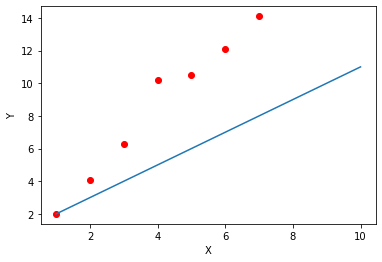

epoch_ 0 :
0.637857142857143  :  0


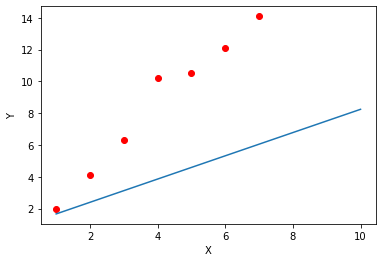

epoch_ 1 :
1.925854396114287  :  0.637857142857143


In [15]:
# training 
w = np.array([[1]*X.shape[1]])
w = w.T
epoch = 10
los_old = 0
for i in range(epoch):  
    # hiển thị đồ thị 
    plt.plot(X.T[1],y,'ro')
    plt.xlabel('X')
    plt.ylabel('Y')
    #x0 = np.linspace(start=1, stop=10, num=50)
    #y0 = w[0]+w[1]*x0
    x1 = np.linspace(start=1, stop=10, num=50)
    x0 = np.array([x1]).T
    one = np.ones((x0.shape[0], 1))
    x0 = np.concatenate((one,x0), axis=1)
    z = np.dot(x0,w[:2])
    y0 = z.T[0]
    plt.plot(x1,y0)
    plt.show()
    
    # cập nhật tham số 
    L = loss(X,y,w)
    print('epoch_',i,':')
    print(L,' : ',los_old)
    if L>(los_old-0.0001) and i>0:
        break
    los_old = L
    # cập nhật 
    w = update_weights(X,y,w,learning_rate)
    
    
    